https://estradawebgroup.com/ImagesUpload/sql-joins.jpg

** TYPES OF JOIN**

We can also say **FULL OUTER JOIN** as **UNION**

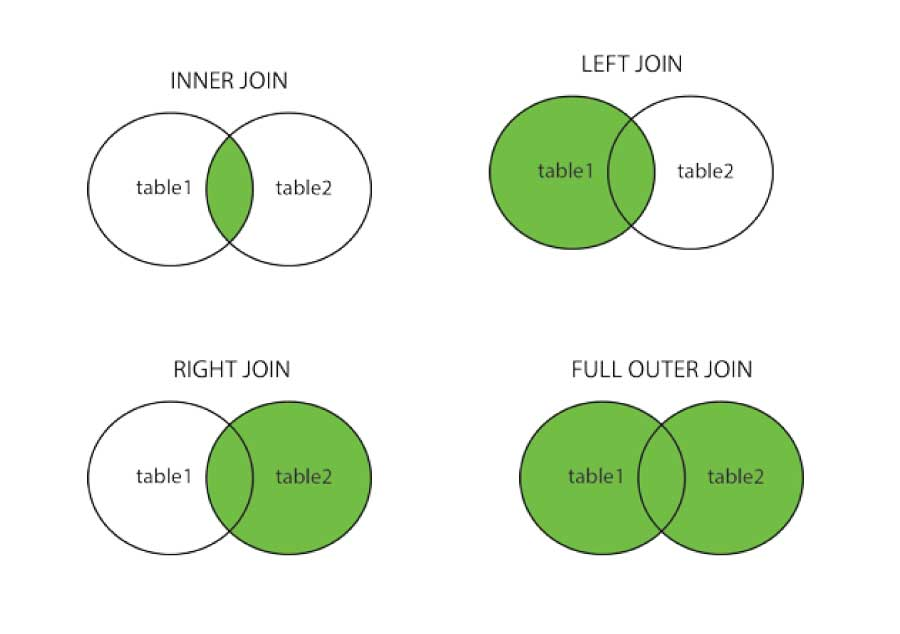

# Merging and Concat

Merging **Horizontally(col by col)** and Concat **Vertically(row by row)**

# Merging

Joining Horizontally(col by col)

In [42]:
import pandas as pd

#staff dataframe
staff_df = pd.DataFrame([{'Name': 'John', 'Role':'HR'},
                         {'Name': 'Jeson', 'Role':'Grader'},
                         {'Name': 'Kelly', 'Role':'Admin'}])
#indexing by name
staff_df = staff_df.set_index('Name')

#student dataframe

student_df = pd.DataFrame([{'Name': 'John', 'School': 'Science'},
                           {'Name': 'Kelly', 'School': 'Engineering'},
                           {'Name': 'Micheal', 'School': 'Business'}])
student_df = student_df.set_index('Name')


print("Staff \n", staff_df.head())
print("Student \n", student_df.head())



Staff 
          Role
Name         
John       HR
Jeson  Grader
Kelly   Admin
Student 
               School
Name                
John         Science
Kelly    Engineering
Micheal     Business


# Union

Merging with **OUTER JOIN** 

pd.merge(`left dataset` , `left dataset`, `how='outer'`, `left_index=True`, `right_index=True`)

In [43]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
Jeson,Grader,NaN
John,HR,Science
Kelly,Admin,Engineering
Micheal,NaN,Business


# Intersection and Inner Join

In [44]:
pd.merge(staff_df, student_df, how = 'inner', left_index = True, right_index = True)

,Role,School
Name,,
John,HR,Science
Kelly,Admin,Engineering


# Left Jion

In [45]:
pd.merge(staff_df, student_df, how = 'left', left_index = True, right_index = True)

,Role,School
Name,,
John,HR,Science
Jeson,Grader,NaN
Kelly,Admin,Engineering


# Right Join

In [46]:
pd.merge(staff_df, student_df, how = 'right', left_index = True, right_index = True)

,Role,School
Name,,
John,HR,Science
Kelly,Admin,Engineering
Micheal,NaN,Business


# ON Parameter(alternative without indexing)

by calling the column-name for **JOINING**

In [47]:
pd.merge(staff_df, student_df, how = 'right', on='Name')

,Role,School
Name,,
John,HR,Science
Kelly,Admin,Engineering
Micheal,NaN,Business


**`ON Parameter`**

while there is a location column for both staff and student dataframe. 

For staff

**Loaction** refers office address

For student 

**Location** refers home address

in that case, **`ON Parameter`** is used to avoid conflict of columns during merging

**`_x`** refers left dataframe

**`_y`** refers right dataframe

In [50]:
staff_df = pd.DataFrame([{'Name': 'John', 'Role': 'HR', 'Location': 'Washington'},
                         {'Name': 'Kelly', 'Role': 'Grader', 'Location': 'Texas'},
                         {'Name': 'John', 'Role': 'Admin', 'Location': 'California'}])

student_df = pd.DataFrame([{'Name': 'James', 'School': 'Science', 'Location': 'New York'},
                           {'Name': 'John', 'School': 'Physics', 'Location': 'Neveda'},
                           {'Name': 'Kelly', 'School': 'Chemistry', 'Location': 'Los Angels'}])
                           

In [52]:
pd.merge(staff_df, student_df, how = 'left', on = 'Name')

,Name,Role,Location_x,School,Location_y
0,John,HR,Washington,Physics,Neveda
1,Kelly,Grader,Texas,Chemistry,Los Angels
2,John,Admin,California,Physics,Neveda


# Multi Indexing and Multiple Columns

There is a chance **First Name** of student dataframe and staff dataframe might overlap.

But **Last Name** student dataframe and staff dataframe might not overlap.

In [57]:
staff_df = pd.DataFrame([{"First Name": "John", "Last Name": "Belmond", "Role": "HR"},
                         {"First Name": "James", "Last Name": "Alter", "Role": "Admin"},
                         {"First Name": "Kelly", "Last Name": "Macdonald", "Role": "Course Co-ordinator"},
                         {"First Name": "John", "Last Name": "Hamard", "Role": "Grader"}
                        ])


student_df = pd.DataFrame([{"First Name": "John", "Last Name": "Belmond", "Class": "Science"},
                         {"First Name": "Micheal", "Last Name": "Stack", "Class": "Business"},
                         {"First Name": "Kelly", "Last Name": "Macdonald", "Class": "Physics"},
                         {"First Name": "Micheal", "Last Name": "Corbat", "Role": "Chemistry"}
                        ])

**Note:** since there are two **John** in staff_df but different **Last Name**, therefore it show wrong answer 

Below is the **Wrong** approach

In [58]:
pd.merge(staff_df, student_df, how ="inner", on = 'First Name')

,First Name,Last Name_x,Role_x,Last Name_y,Class,Role_y
0,John,Belmond,HR,Belmond,Science,NaN
1,John,Hamard,Grader,Belmond,Science,NaN
2,Kelly,Macdonald,Course Co-ordinator,Macdonald,Physics,NaN


**CORRECT WAY IS AS BELOW**

multiple columns in a list for **`on parameter`**

In [60]:
pd.merge(staff_df, student_df, how ='inner', on = ['First Name', 'Last Name'])

,First Name,Last Name,Role_x,Class,Role_y
0,John,Belmond,HR,Science,NaN
1,Kelly,Macdonald,Course Co-ordinator,Physics,NaN


**note** only John Belmond and Kelly Macdonald have involvement for both DataFrame

# Concating

Joining Vertically(row by row)

**Case**

US Department of Education **ScoreCard Data** has stored in **3 different DataFrames** for each year **(2011, 2012, 2013)**

**We need to concat it row by row for 2011 -2013 in a single DataFrame**

**`%%capture`** it's a magic parameter to **ignore bad lines** in **Messy DataFrame**

In [71]:
#%%capture

df_2011 = pd.read_csv("resources/week-3/datasets/college_scorecard/MERGED2011_12_PP.csv")
df_2011.head(5)

ParserError: Error tokenizing data. C error: Expected 1977 fields in line 309, saw 2485


In [72]:
%%capture

df_2011 = pd.read_csv("resources/week-3/datasets/college_scorecard/MERGED2011_12_PP.csv", error_bad_lines = False)


In [73]:
df_2011.head(5)

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654.0,100200.0,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663.0,105200.0,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690.0,2503400.0,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706.0,105500.0,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724.0,100500.0,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
%%capture
df_2011 = pd.read_csv("resources/week-3/datasets/college_scorecard/MERGED2011_12_PP.csv", error_bad_lines = False)
df_2012 = pd.read_csv("resources/week-3/datasets/college_scorecard/MERGED2012_13_PP.csv", error_bad_lines = False)
df_2013 = pd.read_csv("resources/week-3/datasets/college_scorecard/MERGED2013_14_PP.csv", error_bad_lines = False)

In [75]:
df_2011.head(3)

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654.0,100200.0,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663.0,105200.0,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690.0,2503400.0,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
print(len(df_2011))
print(len(df_2012))
print(len(df_2013))

15235
7793
7804


In [77]:
#Concat by list of 3 DataFrames for 2011,2012, 2013

frames= [df_2011, df_2012, df_2013]

pd.concat(frames)

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,OMAWDP8_NOTFIRSTTIME_POOLED_SUPP,OMENRUP_NOTFIRSTTIME_POOLED_SUPP,OMENRYP_FULLTIME_POOLED_SUPP,OMENRAP_FULLTIME_POOLED_SUPP,OMAWDP8_FULLTIME_POOLED_SUPP,OMENRUP_FULLTIME_POOLED_SUPP,OMENRYP_PARTTIME_POOLED_SUPP,OMENRAP_PARTTIME_POOLED_SUPP,OMAWDP8_PARTTIME_POOLED_SUPP,OMENRUP_PARTTIME_POOLED_SUPP
0,100654.0,100200.0,1002,Alabama A & M University,Normal,AL,35762,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100663.0,105200.0,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100690.0,2503400.0,25034,Amridge University,Montgomery,AL,36117-3553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100706.0,105500.0,1055,University of Alabama in Huntsville,Huntsville,AL,35899,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100724.0,100500.0,1005,Alabama State University,Montgomery,AL,36104-0271,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,100751.0,105100.0,1051,The University of Alabama,Tuscaloosa,AL,35487-0166,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,100760.0,100700.0,1007,Central Alabama Community College,Alexander City,AL,35010,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,100812.0,100800.0,1008,Athens State University,Athens,AL,35611,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,100830.0,831000.0,8310,Auburn University at Montgomery,Montgomery,AL,36117-3596,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100858.0,100900.0,1009,Auburn University,Auburn,AL,36849,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
len(pd.concat(frames))

30832

To re-confirm, the DataFrames are concatinating properly or not

In [80]:
len(df_2011) + len(df_2012) + len(df_2013)

30832

# Concate Based on Key Parameters

we do have indices of each year to see the observation of each year

In [81]:
frames = [df_2011, df_2012, df_2013]

pd.concat(frames, keys = ['2011', '2012', '2013'])

UNITID      OPEID OPEID6  \
2011 0       100654.0   100200.0   1002   
     1       100663.0   105200.0   1052   
     2       100690.0  2503400.0  25034   
     3       100706.0   105500.0   1055   
     4       100724.0   100500.0   1005   
...               ...        ...    ...   
2013 7799  48285703.0   157107.0   1571   
     7800  48285704.0   157101.0   1571   
     7801  48285705.0   157105.0   1571   
     7802  48285706.0   157100.0   1571   
     7803  48285707.0   157103.0   1571   

                                                  INSTNM            CITY  \
2011 0                          Alabama A & M University          Normal   
     1               University of Alabama at Birmingham      Birmingham   
     2                                Amridge University      Montgomery   
     3               University of Alabama in Huntsville      Huntsville   
     4                          Alabama State University      Montgomery   
...                                                  ...             ...   
2013 7799       Georgia Military College-Columbus Campus        Columbus   
     7800       Georgia Military College-Valdosta Campus        Valdosta   
     7801  Georgia Military College-Warner Robins Campus   Warner Robins   
     7802                Georgia Military College-Online   Milledgeville   
     7803        Georgia Military College-Stone Mountain  Stone Mountain   

          STABBR         ZIP  ACCREDAGENCY INSTURL NPCURL  ...  \
2011 0        AL       35762           NaN     NaN    NaN  ...   
     1        AL  35294-0110           NaN     NaN    NaN  ...   
     2        AL  36117-3553           NaN     NaN    NaN  ...   
     3        AL       35899           NaN     NaN    NaN  ...   
     4        AL  36104-0271           NaN     NaN    NaN  ...   
...          ...         ...           ...     ...    ...  ...   
2013 7799     GA       31909           NaN     NaN    NaN  ...   
     7800     GA       31605           NaN     NaN    NaN  ...   
     7801     GA       31093           NaN     NaN    NaN  ...   
     7802     GA       31061           NaN     NaN    NaN  ...   
     7803     GA       30083           NaN     NaN    NaN  ...   

          OMAWDP8_NOTFIRSTTIME_POOLED_SUPP OMENRUP_NOTFIRSTTIME_POOLED_SUPP  \
2011 0                                 NaN                              NaN   
     1                                 NaN                              NaN   
     2                                 NaN                              NaN   
     3                                 NaN                              NaN   
     4                                 NaN                              NaN   
...                                    ...                              ...   
2013 7799                              NaN                              NaN   
     7800                              NaN                              NaN   
     7801                              NaN                              NaN   
     7802                              NaN                              NaN   
     7803                              NaN                              NaN   

          OMENRYP_FULLTIME_POOLED_SUPP OMENRAP_FULLTIME_POOLED_SUPP  \
2011 0                             NaN                          NaN   
     1                             NaN                          NaN   
     2                             NaN                          NaN   
     3                             NaN                          NaN   
     4                             NaN                          NaN   
...                                ...                          ...   
2013 7799                          NaN                          NaN   
     7800                          NaN                          NaN   
     7801                          NaN                          NaN   
     7802                          NaN                          NaN   
     7803                          NaN                        

When we don't have any identical column between / among **2 0r 3 Dataframes**, we can choose **OUTER METHOD**

It will **show NaN** where **columns are not being matched**.

If we use **INNER METHOD**, it will drop the rows which have **NaN** in any **column** of **those rows**

# Pandas Idoms

pandorable concept

In [2]:
import pandas as pd
import numpy as np

#timing functionality
import timeit

In [3]:
df = pd.read_csv("resources/week-3/datasets/census.csv")
df.head(3)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499


# pandas idoms (Method Chaining)

In [4]:
(df.where(df['SUMLEV']==50)
.dropna()
.set_index(['STNAME', 'CTYNAME'])
.rename(columns = {'ESTIMATESBASE2010': 'ESTIMATES BASE 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  ESTIMATES BASE 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County           54571.0              54571.0   
        Baldwin County          182265.0             182265.0   
        Barbour County           27457.0              27457.0   
        Bibb County              22915.0              22919.0   
        Blount County            57322.0              57322.0   
...                                  ...                  ...   
Wyoming Sweetwater County        43806.0              43806.0   
        Teton County             21294.0              21294.0   
        Uinta County             21118.0              21118.0   
        Washakie County           8533.0               8533.0   
        Weston County             7208.0               7208.0   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County             54660.0          55253.0          55175.0   
        Baldwin County            183193.0         186659.0         190396.0   
        Barbour County             27341.0          27226.0          27159.0   
        Bibb County                22861.0          22733.0          22642.0   
        Blount County              57373.0          57711.0          57776.0   
...                                    ...              ...              ...   
Wyoming Sweetwater County          43593.0          44041.0          45104.0   
        Teton County               21297.0          21482.0          21697.0   
        Uinta County               21102.0          20912.0          20989.0   
        Washakie County             8545.0           8469.0           8443.0   
        Weston County               7181.0           7114.0           7065.0   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

**Note:** here we first perform only returns those rows **where** **'SUMLEV' ==50** by **droping the null** value at time. and Then perform the **Multiple Indexing** and **rename** a column at a timee

# Traditional Apporach

In [5]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME', 'CTYNAME'], inplace = True)
df.rename(columns = {'ESTIMATESBASE2010': 'ESTIMATE BASE 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
        Blount County          50       3         6      1       9   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County      50       4         8     56      37   
        Teton County           50       4         8     56      39   
        Uinta County           50       4         8     56      41   
        Washakie County        50       4         8     56      43   
        Weston County          50       4         8     56      45   

                           CENSUS2010POP  ESTIMATE BASE 2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                                 
Alabama Autauga County             54571               54571            54660   
        Baldwin County            182265              182265           183193   
        Barbour County             27457               27457            27341   
        Bibb County                22915               22919            22861   
        Blount County              57322               57322            57373   
...                                  ...                 ...              ...   
Wyoming Sweetwater County          43806               43806            43593   
        Teton County               21294               21294            21297   
        Uinta County               21118               21118            21102   
        Washakie County             8533                8533             8545   
        Weston County               7208                7208             7181   

                           POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                              ...   
Alabama Autauga County               55253            55175  ...   
        Baldwin County              186659           190396  ...   
        Barbour County               27226            27159  ...   
        Bibb County                  22733            22642  ...   
        Blount County                57711            57776  ...   
...                                    ...              ...  ...   
Wyoming Sweetwater County            44041            45104  ...   
        Teton County                 21482            21697  ...   
        Uinta County                 20912            20989  ...   
        Washakie County               8469             8443  ...   
        Weston County                 7114             7065  ...   

                           RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME                                                 
Alabama Autauga County             7.242091         -2.915927   
        Baldwin County            14.832960         17.647293   
        Barbour County            -4.728132         -2.500690   
        Bibb County               -5.527043         -5.068871   
        Blount County              1.807375         -1.177622   
...                                     ...               ...   
Wyoming Sweetwater County          1.072643         16.243199   
        Teton County              -1.589565          0.972695   
        Uinta County             -17.755986         -4.916350   
        Washakie County          -11.637475         -0.827815   
        Weston County            -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904217   
      

# Comparing Time to RUN

In [6]:
def first_approach():
    global df
    
    return (df.where(df['SUMLEV']==50)
           .dropna()
           .set_index(['STNAME', 'CTYNAME'])
           .rename(columns={'ESTIMATESBASE2010': 'ESTIMATES BASE 2010'}))

df=pd.read_csv("resources/week-3/datasets/census.csv")

timeit.timeit(first_approach, number =10)           


0.5709216892719269

In [7]:
def second_approach():
    global df
    
    df2 = df[df['SUMLEV']==50]
    df2.set_index(['STNAME', 'CTYNAME'], inplace =True)
    df2.rename(columns = {'ESTIMATESBASE2010': 'ESTIMATES BASE 2010'})
    return df2

df=pd.read_csv("resources/week-3/datasets/census.csv")

timeit.timeit(second_approach, number =10)  


0.09098798036575317

**Note:** second approach is way faster than Chain Approach. 

**Apply Map**

Python has a function called **`map`** to perform iteration for each value in a list. 

Similarly **pandas** has **`applymap`**

In [9]:
df.columns

Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'NPOPCHG_2010', 'NPOPCHG_2011',
       'NPOPCHG_2012', 'NPOPCHG_2013', 'NPOPCHG_2014', 'NPOPCHG_2015',
       'BIRTHS2010', 'BIRTHS2011', 'BIRTHS2012', 'BIRTHS2013', 'BIRTHS2014',
       'BIRTHS2015', 'DEATHS2010', 'DEATHS2011', 'DEATHS2012', 'DEATHS2013',
       'DEATHS2014', 'DEATHS2015', 'NATURALINC2010', 'NATURALINC2011',
       'NATURALINC2012', 'NATURALINC2013', 'NATURALINC2014', 'NATURALINC2015',
       'INTERNATIONALMIG2010', 'INTERNATIONALMIG2011', 'INTERNATIONALMIG2012',
       'INTERNATIONALMIG2013', 'INTERNATIONALMIG2014', 'INTERNATIONALMIG2015',
       'DOMESTICMIG2010', 'DOMESTICMIG2011', 'DOMESTICMIG2012',
       'DOMESTICMIG2013', 'DOMESTICMIG2014', 'DOMESTICMIG2015', 'NETMIG2010',
       'NETMIG2011', 'NETMIG2012', 'NETMI

# **`apply function`**

find out min and max poplupation of each rows based on some columns of population of 2010, 2011,2012,2013,2014,2015 in diffrent columns

In [12]:
data = row[['POPESTIMATE2010',
               'POPESTIMATE2011',
               'POPESTIMATE2012',
               'POPESTIMATE2013',
               'POPESTIMATE2014',
               'POPESTIMATE2015']]
pd.series({'min': np.min(data), 'max': np.max(data)})

NameError: name 'row' is not defined

In [13]:
def minmax(row):
    data = row[['POPESTIMATE2010',
               'POPESTIMATE2011',
               'POPESTIMATE2012',
               'POPESTIMATE2013',
               'POPESTIMATE2014',
               'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [14]:
df.apply(minmax, axis ='columns').head(10)


,min,max
0,4785161,4858979
1,54660,55347
2,183193,203709
3,26489,27341
4,22512,22861
5,57373,57776
6,10606,10887
7,20154,20944
8,115620,118437
9,33993,34153


In [33]:
df_minmax = df.apply(minmax, axis ='columns')
df_minmax.head(10)

,min,max
0,4785161,4858979
1,54660,55347
2,183193,203709
3,26489,27341
4,22512,22861
5,57373,57776
6,10606,10887
7,20154,20944
8,115620,118437
9,33993,34153


In [15]:
data = df[['POPESTIMATE2010',
               'POPESTIMATE2011',
               'POPESTIMATE2012',
               'POPESTIMATE2013',
               'POPESTIMATE2014',
               'POPESTIMATE2015']]
data.head(10)

,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,4785161,4801108,4816089,4830533,4846411,4858979
1,54660,55253,55175,55038,55290,55347
2,183193,186659,190396,195126,199713,203709
3,27341,27226,27159,26973,26815,26489
4,22861,22733,22642,22512,22549,22583
5,57373,57711,57776,57734,57658,57673
6,10887,10629,10606,10628,10829,10696
7,20944,20673,20408,20261,20276,20154
8,118437,117768,117286,116575,115993,115620
9,34098,33993,34075,34153,34052,34123


In [35]:
frames =[data, df_minmax]
pd.concat(frames, axis =1).head(10)

,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,min,max
0,4785161,4801108,4816089,4830533,4846411,4858979,4785161,4858979
1,54660,55253,55175,55038,55290,55347,54660,55347
2,183193,186659,190396,195126,199713,203709,183193,203709
3,27341,27226,27159,26973,26815,26489,26489,27341
4,22861,22733,22642,22512,22549,22583,22512,22861
5,57373,57711,57776,57734,57658,57673,57373,57776
6,10887,10629,10606,10628,10829,10696,10606,10887
7,20944,20673,20408,20261,20276,20154,20154,20944
8,118437,117768,117286,116575,115993,115620,115620,118437
9,34098,33993,34075,34153,34052,34123,33993,34153


**More Precisely**

In [16]:
def minmax(row):
    data = row[['POPESTIMATE2010',
               'POPESTIMATE2011',
               'POPESTIMATE2012',
               'POPESTIMATE2013',
               'POPESTIMATE2014',
               'POPESTIMATE2015']]
    row['min'] = np.min(data)
    row['max'] = np.max(data)
    
    return row
#df..apply(minmax, axis =1).head(5) #perform on full dataset
data.apply(minmax, axis =1).head(5)

,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,min,max
0,4785161,4801108,4816089,4830533,4846411,4858979,4785161,4858979
1,54660,55253,55175,55038,55290,55347,54660,55347
2,183193,186659,190396,195126,199713,203709,183193,203709
3,27341,27226,27159,26973,26815,26489,26489,27341
4,22861,22733,22642,22512,22549,22583,22512,22861


# Alternative **`apply()`** and **`lambda`**



In [17]:
row = ['POPESTIMATE2010',
               'POPESTIMATE2011',
               'POPESTIMATE2012',
               'POPESTIMATE2013',
               'POPESTIMATE2014',
               'POPESTIMATE2015']

In [18]:
df.apply(lambda x : np.min(x[row]), axis=1).head(5)

0    4785161
1      54660
2     183193
3      26489
4      22512
dtype: int64

In [19]:
df_min = pd.DataFrame(df.apply(lambda x : np.min(x[row]), axis=1))
df_min.columns = ['min']
df_min.head(3)                  

,min
0,4785161
1,54660
2,183193


note **`lambda`** is a function which takes a parameter and return all the max values of corresponding columns for each row.

# Manipulation and Customization with Apply()

In [4]:
import pandas as pd
import numpy as np

#timing functionality
import timeit

In [5]:
df = pd.read_csv("resources/week-3/datasets/census.csv")
df.head(3)


,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499


In [13]:
def get_state_region(x):
    northeast = ['Connecticut', 'Marine', 'Massachusetts', 'New Hampshire',
                'Rhode Island', 'Vermont', 'New York', 'Ne Jersey', 'Pennysylvania']
    
    midwest = ['Illinois', 'Indiana', 'Michgan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas',
              'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']
    
    south = ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina',
            'Virginia', 'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 
             'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']
    
    west = ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah',
            'Wyoming', 'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
    
    if x in northeast:
        return "northeast"
    elif x in midwest:
        return "midwest"
    elif x in south:
        return "south"
    else:
        return "west"

In [22]:
# df.columns

Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'NPOPCHG_2010', 'NPOPCHG_2011',
       'NPOPCHG_2012', 'NPOPCHG_2013', 'NPOPCHG_2014', 'NPOPCHG_2015',
       'BIRTHS2010', 'BIRTHS2011', 'BIRTHS2012', 'BIRTHS2013', 'BIRTHS2014',
       'BIRTHS2015', 'DEATHS2010', 'DEATHS2011', 'DEATHS2012', 'DEATHS2013',
       'DEATHS2014', 'DEATHS2015', 'NATURALINC2010', 'NATURALINC2011',
       'NATURALINC2012', 'NATURALINC2013', 'NATURALINC2014', 'NATURALINC2015',
       'INTERNATIONALMIG2010', 'INTERNATIONALMIG2011', 'INTERNATIONALMIG2012',
       'INTERNATIONALMIG2013', 'INTERNATIONALMIG2014', 'INTERNATIONALMIG2015',
       'DOMESTICMIG2010', 'DOMESTICMIG2011', 'DOMESTICMIG2012',
       'DOMESTICMIG2013', 'DOMESTICMIG2014', 'DOMESTICMIG2015', 'NETMIG2010',
       'NETMIG2011', 'NETMIG2012', 'NETMI

Add a new column as `state_region` where we will match the list of region with exsiting column `STNAME` and tag them accordingly

In [25]:
df['region'] = df['STNAME']. apply(lambda x : get_state_region(x))

In [26]:
df[['STNAME', 'region']].head(5)

,STNAME,region
0,Alabama,south
1,Alabama,south
2,Alabama,south
3,Alabama,south
4,Alabama,south


# Group By()

it will take some dataframe and split into a chunk based on some key values. And apply computation on those chunks.

In [19]:
import pandas as pd
import numpy as np

In [27]:
df = pd.read_csv("resources/week-3/datasets/census.csv")

df1 = df[df['SUMLEV']==50]
df1.head(3)

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299


To find the avg CENSUS2010POP column (Census of 2010) of each state 

In [29]:
%%timeit -n 3

for state in df['STNAME'].unique():
    avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
    print('Counties in State ' + state + ' have average population of 2010 ' + str(avg))

Counties in State Alabama have average population of 2010 140580.4705882353
Counties in State Alaska have average population of 2010 47348.73333333333
Counties in State Arizona have average population of 2010 799002.125
Counties in State Arkansas have average population of 2010 76734.68421052632
Counties in State California have average population of 2010 1262845.9661016949
Counties in State Colorado have average population of 2010 154744.4923076923
Counties in State Connecticut have average population of 2010 794243.7777777778
Counties in State Delaware have average population of 2010 448967.0
Counties in State District of Columbia have average population of 2010 601723.0
Counties in State Florida have average population of 2010 552979.7058823529
Counties in State Georgia have average population of 2010 121095.6625
Counties in State Hawaii have average population of 2010 453433.6666666667
Counties in State Idaho have average population of 2010 69670.3111111111
Counties in State Illino

above is time consuming. Alternatively we can use groupby to get faster response

# Group By

To find the avg CENSUS2010POP column (Census of 2010) of each state 

In [31]:
%%timeit -n 3
for group, frame in df.groupby('STNAME'):
    
    avg = np.average(frame['CENSUS2010POP'])
    
    print('Counties in state ' + group + ' have a population for 2010 ' + str(avg))

Counties in state Alabama have a population for 2010 140580.4705882353
Counties in state Alaska have a population for 2010 47348.73333333333
Counties in state Arizona have a population for 2010 799002.125
Counties in state Arkansas have a population for 2010 76734.68421052632
Counties in state California have a population for 2010 1262845.9661016949
Counties in state Colorado have a population for 2010 154744.4923076923
Counties in state Connecticut have a population for 2010 794243.7777777778
Counties in state Delaware have a population for 2010 448967.0
Counties in state District of Columbia have a population for 2010 601723.0
Counties in state Florida have a population for 2010 552979.7058823529
Counties in state Georgia have a population for 2010 121095.6625
Counties in state Hawaii have a population for 2010 453433.6666666667
Counties in state Idaho have a population for 2010 69670.3111111111
Counties in state Illinois have a population for 2010 249138.4854368932
Counties in state

# Big Batch Job

we may use groupby funtion for one or more columns. 

We need to `set_index` to be the column of a **dataframe**

We need to place batch number as per first letter of STNAME columns is **less than 'M' will return 0, greater than 'Q' return 1 and others 2**. We must **set 'STNAME' column as 'index' of that dataframe.**

In [38]:
df1 = df.set_index('STNAME')

def set_batch_number(item):
    if item[0] < 'M':
        return 0
    if item[0] < 'Q':
        return 1
    return 2

for group, frame in df1.groupby(set_batch_number):
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')

There are 1196 records in group 0 for processing.
There are 1154 records in group 1 for processing.
There are 843 records in group 2 for processing.


# Group By for multiple column index

**Airnbn** dataset with cancelation policy and review score column as multiple index

In [40]:
df = pd.read_csv('resources/week-3/datasets/listings.csv')
df.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [41]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [42]:
df = df.set_index(['cancellation_policy', 'review_scores_value'])

In [43]:
for group, frame in df.groupby(level = (0, 1)):
    print(group)

('flexible', 2.0)
('flexible', 4.0)
('flexible', 5.0)
('flexible', 6.0)
('flexible', 7.0)
('flexible', 8.0)
('flexible', 9.0)
('flexible', 10.0)
('moderate', 2.0)
('moderate', 4.0)
('moderate', 6.0)
('moderate', 7.0)
('moderate', 8.0)
('moderate', 9.0)
('moderate', 10.0)
('strict', 2.0)
('strict', 3.0)
('strict', 4.0)
('strict', 5.0)
('strict', 6.0)
('strict', 7.0)
('strict', 8.0)
('strict', 9.0)
('strict', 10.0)
('super_strict_30', 6.0)
('super_strict_30', 7.0)
('super_strict_30', 8.0)
('super_strict_30', 9.0)
('super_strict_30', 10.0)


note: for mutiple column index, we need to level them in groupby function. Since there are two columns in our case,
    
**0 is for 'cancellation_policy'**

**1 is for 'review_scores_value'**

# Define Function to retrun review 10 or not 10


In [48]:
def group_review(item):
    if item[1] == 10.0:
        return (item[0], '10.0')
    else:
        return (item[0], 'not 10.0')

for group, frame in df.groupby(by = group_review):
    print(group)

('flexible', '10.0')
('flexible', 'not 10.0')
('moderate', '10.0')
('moderate', 'not 10.0')
('strict', '10.0')
('strict', 'not 10.0')
('super_strict_30', '10.0')
('super_strict_30', 'not 10.0')


# Aggregation, Transformation and Filteration of Group Data

Pandas has three broad categories of group data. 
**Aggregation, Transformation and Filteration**

# Aggregation using `agg()`

with `agg()` we can pass a dictionary of columns we are interested in and aggregate anlong with the function 


In [1]:
import pandas as pd
import numpy as np

In [ ]:
#df = pd.read_csv('resources/week-3/datasets/listings.csv')
#df.head(5)

In [49]:
df = df.reset_index()

In [52]:
import pandas as pd
import numpy as np

In [53]:
df.groupby('cancellation_policy').agg({"review_scores_value": np.average})

,review_scores_value
cancellation_policy,
flexible,NaN
moderate,NaN
strict,NaN
super_strict_30,NaN


note: we need to use `np.nanmean` (which will ignore nan value) to get the average value. As `np.average` doesn't ignore `nan value`

In [57]:
df.groupby('cancellation_policy').agg({'review_scores_value': np.nanmean})

,review_scores_value
cancellation_policy,
flexible,9.237421
moderate,9.307398
strict,9.081441
super_strict_30,8.537313


# Group by and Aggregation for multiple column result in dictionary

In [59]:
df.groupby('cancellation_policy').agg({'review_scores_value': (np.nanmean, np.nanstd),
                                      'reviews_per_month': np.nanmean})

review_scores_value           reviews_per_month
                                nanmean    nanstd           nanmean
cancellation_policy                                                
flexible                       9.237421  1.096271          1.829210
moderate                       9.307398  0.859859          2.391922
strict                         9.081441  1.040531          1.873467
super_strict_30                8.537313  0.840785          0.340143

note: First we groupby with column name 'Cancellation_policy' and then we apply aggregation to get the outcome for two different columns

# Transformation

Aggregation returns **single value per column/per group** whereas **Transformation** returns single value for **each row/observation** (newdataframe) as per group without changing the shape of group by Dataframe.
Transformation refers as **`transfrom()`**

In [2]:
import pandas as pd
import numpy as np

In [29]:
df = pd.read_csv('resources/week-3/datasets/listings.csv')
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [23]:
df.reset_index()

,index,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,mean_review_scores_x,mean_review_scores_y
0,0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,...,NaN,NaN,f,moderate,f,f,1,NaN,9.307398,9.307398
1,1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,...,NaN,NaN,t,moderate,f,f,1,1.30,9.307398,9.307398
2,2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,...,NaN,NaN,f,moderate,t,f,1,0.47,9.307398,9.307398
3,3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,...,NaN,NaN,f,moderate,f,f,1,1.00,9.307398,9.307398
4,4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,...,NaN,NaN,f,flexible,f,f,1,2.25,9.237421,9.237421
5,5,12386020,https://www.airbnb.com/rooms/12386020,20160906204935,2016-09-07,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,Our sunny condo is located on the second and t...,Super comfy bedroom plus your own bathroom in ...,none,...,NaN,NaN,f,flexible,f,f,1,1.70,9.237421,9.237421
6,6,5706985,https://www.airbnb.com/rooms/5706985,20160906204935,2016-09-07,New Lrg Studio apt 15 min to Boston,It's a 5 minute walk to Rosi Square to catch t...,The whole house was recently redone and it 's ...,It's a 5 minute walk to Rosi Square to catch t...,none,...,NaN,NaN,f,strict,f,f,3,4.00,9.081441,9.081441
7,7,2843445,https://www.airbnb.com/rooms/2843445,20160906204935,2016-09-07,"""Tranquility"" on ""Top of the Hill""","We can accommodate guests who are gluten-free,...",We provide a bedroom and full shared bath. Ra...,"We can accommodate guests who are gluten-free,...",none,...,NaN,NaN,f,moderate,t,t,2,2.38,9.307398,9.307398
8,8,753446,https://www.airbnb.com/rooms/753446,20160906204935,2016-09-07,6 miles away from downtown Boston!,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,none,...,NaN,NaN,f,moderate,f,f,1,5.36,9.307398,9.307398
9,9,849408,https://www.airbnb.com/rooms/849408,20160906204935,2016-09-07,Perfect & Practical Boston Rental,This is a cozy and spacious two bedroom unit w...,Perfect apartment rental for those in town vis...,This is a cozy and spacious two bedroom unit w...,none,...,NaN,NaN,f,strict,f,f,2,1.01,9.081441,9.081441


In [30]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [31]:
cols = ['cancellation_policy', 'review_scores_value']

In [32]:
transform_df = df[cols].groupby('cancellation_policy').transform(np.nanmean)
transform_df.head()

,review_scores_value
0,9.307398
1,9.307398
2,9.307398
3,9.307398
4,9.237421


In [27]:
transform_df.shape

(3585, 1)

In [34]:
df.shape

(3585, 95)

In [36]:
transform_df.rename({'review_scores_value': 'mean_review_scores'}, axis='columns', inplace=True)

In [37]:
df = df.merge(transform_df, left_index=True, right_index=True)

In [38]:
df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,mean_review_scores
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,f,NaN,NaN,f,moderate,f,f,1,NaN,9.307398
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,f,NaN,NaN,t,moderate,f,f,1,1.30,9.307398
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,f,NaN,NaN,f,moderate,t,f,1,0.47,9.307398


In [39]:
# Now we will calculate mean difference and retrieve as absolute value

In [41]:
df['mean_diff'] = np.absolute(df['review_scores_value'] - df['mean_review_scores'])

In [43]:
df.shape

(3585, 97)

In [45]:
df['mean_diff']

0            NaN
1       0.307398
2       0.692602
3       0.692602
4       0.762579
          ...   
3580    0.081441
3581         NaN
3582         NaN
3583    2.081441
3584         NaN
Name: mean_diff, Length: 3585, dtype: float64

# Filter

Filter which will apply each group DataFrame and return boolean (True/False). Filter based on where review is greater than >9.2

In [46]:
df.groupby('cancellation_policy').filter(lambda x: np.nanmean(x['review_scores_value'])>9.2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,mean_review_scores,mean_diff
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,NaN,f,moderate,f,f,1,NaN,9.307398,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,NaN,NaN,t,moderate,f,f,1,1.30,9.307398,0.307398
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,NaN,NaN,f,moderate,t,f,1,0.47,9.307398,0.692602
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,NaN,NaN,f,moderate,f,f,1,1.00,9.307398,0.692602
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,NaN,NaN,f,flexible,f,f,1,2.25,9.237421,0.762579
5,12386020,https://www.airbnb.com/rooms/12386020,20160906204935,2016-09-07,Private Bedroom + Great Coffee,Super comfy bedroom plus your own bathroom in ...,Our sunny condo is located on the second and t...,Super comfy bedroom plus your own bathroom in ...,none,We love our corner of Roslindale! For quiet wa...,...,NaN,NaN,f,flexible,f,f,1,1.70,9.237421,0.762579
7,2843445,https://www.airbnb.com/rooms/2843445,20160906204935,2016-09-07,"""Tranquility"" on ""Top of the Hill""","We can accommodate guests who are gluten-free,...",We provide a bedroom and full shared bath. Ra...,"We can accommodate guests who are gluten-free,...",none,Our neighborhood is residential with friendly ...,...,NaN,NaN,f,moderate,t,t,2,2.38,9.307398,0.692602
8,753446,https://www.airbnb.com/rooms/753446,20160906204935,2016-09-07,6 miles away from downtown Boston!,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,Nice and cozy apartment about 6 miles away to ...,none,Roslindale is a primarily residential neighbor...,...,NaN,NaN,f,moderate,f,f,1,5.36,9.307398,0.692602
10,12023024,https://www.airbnb.com/rooms/12023024,20160906204935,2016-09-07,Cozy room in a well located house,The room is in a single family house located i...,NaN,The room is in a single family house located i...,none,NaN,...,NaN,NaN,f,flexible,f,f,1,0.36,9.237421,0.762579
11,1668313,https://www.airbnb.com/rooms/1668313,20160906204935,2016-09-07,Room in Rozzie-Twin Bed-Full Bath,Quiet second floor bedroom sleeps one in comfo...,NaN,Quiet second floor bedroom sleeps one in comfo...,none,Our neighborhood is quiet and relaxed. There i...,...,NaN,NaN,f,flexible,f,f,2,0.48,9.237421,0.237421


# Applying

In [50]:
df = pd.read_csv('resources/week-3/datasets/listings.csv')
df.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.3


In [53]:
df = df[['cancellation_policy', 'review_scores_value']]
df.head(5)

,cancellation_policy,review_scores_value
0,moderate,NaN
1,moderate,9.0
2,moderate,10.0
3,moderate,10.0
4,flexible,10.0


In [55]:
def cal_mean_review_score(group):
    avg = np.nanmean(group['review_scores_value'])
    group['review_scores_mean'] = np.abs(avg - group['review_scores_value'])
    return group

In [57]:
df.groupby('cancellation_policy').apply(cal_mean_review_score).head()

,cancellation_policy,review_scores_value,review_scores_mean
0,moderate,NaN,NaN
1,moderate,9.0,0.307398
2,moderate,10.0,0.692602
3,moderate,10.0,0.692602
4,flexible,10.0,0.762579


note: apply() function is slow and general approach. groupby() is powerful function when would like to apply aggr()/aggregated analysis. Using **groupby()**, data **splits** into a **subgroups** and we can perform **aggregation, transformation, filter and apply**.